## Credit Card Fraud Detection

In [46]:
# Data preprocessing and visualization modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning modules
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, roc_auc_score, f1_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


In [17]:
# Read csv
df=pd.read_csv(r'C:\Users\saroj\Downloads\creditcard\creditcard.csv')
print(f"No. of rows in the dataset ==>> {df.shape[0]}")
print(f"No. of columns in the dataset ==>> {df.shape[1]}")

No. of rows in the dataset ==>> 284807
No. of columns in the dataset ==>> 31


In [19]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [81]:
df.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,2.239053e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [21]:
print("the name of the columns in the dataset are : ")
df.columns

the name of the columns in the dataset are : 


Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [23]:
# dropping time column
df.drop(["Time"],axis=1,inplace=True)
df.dtypes

V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [25]:
df.isna().sum()

V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [27]:
df_fraud=df[df.Class==1]
df_true=df[df.Class==0]
df_true=df_true.sample(frac=0.5)
data=pd.concat([df_true,df_fraud])
data = data.reset_index(drop=True)
data.shape

(142650, 30)

In [29]:
data['Amount'].describe()

count    142650.000000
mean         87.876973
std         250.060296
min           0.000000
25%           5.490000
50%          21.950000
75%          76.760000
max       19656.530000
Name: Amount, dtype: float64

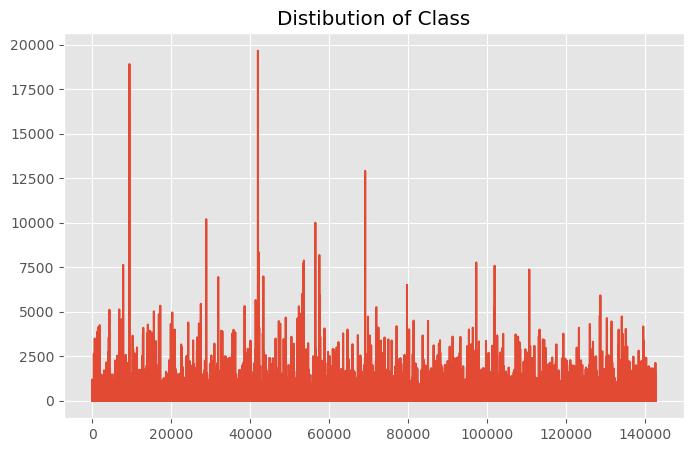

In [31]:
with plt.style.context(('ggplot')):
    plt.figure(figsize=(8,5))
    plt.title("Distibution of Class")
    plt.plot(data["Amount"])
    plt.show()

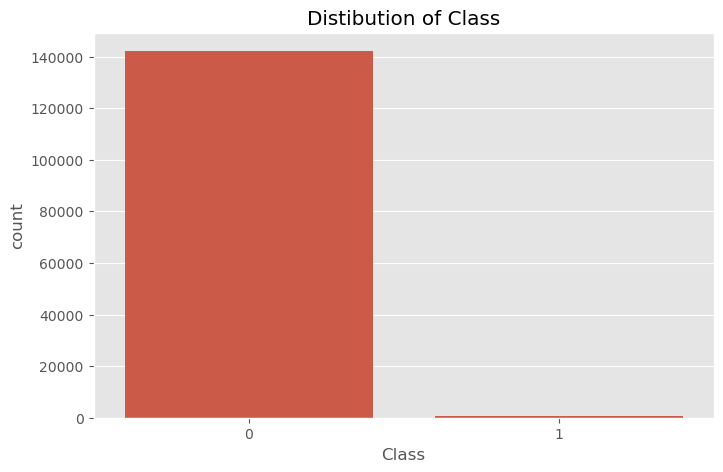

In [33]:
with plt.style.context(('ggplot')):
    plt.figure(figsize=(8,5))
    plt.title("Distibution of Class")
    sns.countplot(data=data,x=data["Class"])
    plt.show()

In [35]:
fraud_per=round((len(df[df.Class==1])/len(df[df.Class==0]))*100,2)
print(f"The percentage of fraud transactions is {fraud_per} %")

The percentage of fraud transactions is 0.17 %


In [37]:
# scaling the Amount column with standard scaling process
sc=StandardScaler()
data.Amount=sc.fit_transform(data.Amount.values.reshape(-1,1))
data.Amount

0        -0.307515
1        -0.005667
2        -0.325670
3        -0.260966
4        -0.091526
            ...   
142645    1.208205
142646   -0.348385
142647   -0.039938
142648    0.628343
142649   -0.181345
Name: Amount, Length: 142650, dtype: float64

In [39]:
# drop duplicate data
data.drop_duplicates(inplace=True)
data.shape

(139605, 30)

In [41]:
# Train Test split
x=data.drop(["Class"],axis=1)
y=data["Class"]
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8)

## Logistic Regression

In [91]:
model_log=LogisticRegression()
model_log.fit(x_train,y_train)
y_pred_log=model_log.predict(x_test)
print(f"The accuracy of the model is {round(model_log.score(x_test,y_test)*100,2)}%")

The accuracy of the model is 99.87%


In [50]:
print(f"F1-Score of the model is {round(f1_score(y_test,y_pred_log),2)}")

F1-Score of the model is 0.8


## Random Forest Classifier

In [61]:
from sklearn.ensemble import RandomForestClassifier


In [63]:
model=RandomForestClassifier()
model.fit(x_train,y_train)
y_pred_random=model.predict(x_test)

In [93]:
print(f"The accuracy of the model is {round(model.score(x_test,y_test)*100,2)}%")

The accuracy of the model is 99.91%


In [73]:
print(f"F1-Score of the model is {round(f1_score(y_test,y_pred_random),2)}")

F1-Score of the model is 0.85


## Applying Xgboost Model

In [99]:
pip install xgboost

   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB 330.3 kB/s eta 0:06:19
   ---------------------------------------- 0.0/124.9 MB 326.8 kB/s eta 0:06:23
   ---------------------------------------- 0.1/124.9 MB 655.4 kB/s eta 0:03:11
   ---------------------------------------- 0.3/124.9 MB 1.7 MB/s eta 0:01:13
   ---------------------------------------- 0.8/124.9 MB 3.4 MB/s eta 0:00:37
   ---------------------------------------- 1.4/124.9 MB 5.0 MB/s eta 0:00:25
    --------------------------------------- 2.0/124.9 MB 6.1 MB/s eta 0:00:21
    --------------------------------------- 2.6/124.9 MB 6.8 MB/s eta 0:00:18
    --------------------------------------- 3.0/124.9 MB 7.0 MB/s eta 0:00:18
   - -------------------------------------- 3.5/124.9 MB 7.4 MB/s eta 0:00:17
   - -------------------------------------- 3.9/124.9 MB 7.8 MB/s eta 0:00:16
   - -------------------------------------- 4.3/124.9 MB 7.9 MB/s

In [103]:
from xgboost import XGBClassifier


In [105]:
model_xgb=XGBClassifier(max_depth=2)
model_xgb.fit(x_train,y_train)
y_pred_xgb=model_xgb.predict(x_test)

In [107]:
print(f"The accuracy of the model is {round(model_xgb.score(x_test,y_test)*100,2)}%")

The accuracy of the model is 99.91%


In [109]:
print(f"F1-Score of the model is {round(f1_score(y_test,y_pred_xgb),2)}")

F1-Score of the model is 0.86


## Checking performance of the all the models

In [114]:
from sklearn import metrics

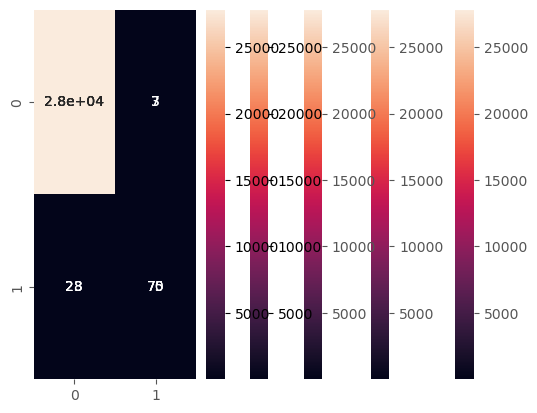

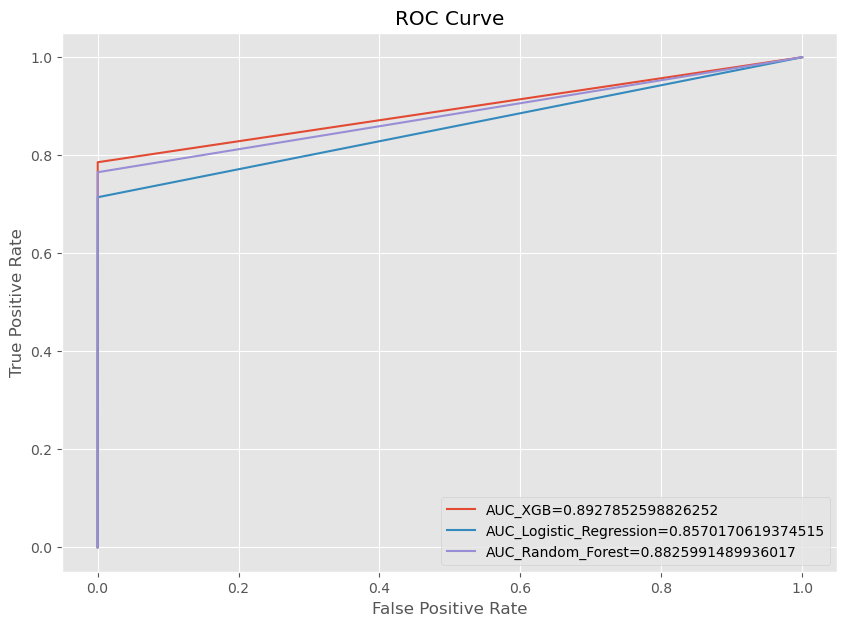

In [118]:
#xgbbost
fpr_xgb, tpr_xgb, _ = metrics.roc_curve(y_test,  y_pred_xgb)
auc_xgb = metrics.roc_auc_score(y_test, y_pred_xgb)
#logistic-regression
fpr_log, tpr_log, _ = metrics.roc_curve(y_test,  y_pred_log)
auc_log = metrics.roc_auc_score(y_test, y_pred_log)
#random-forest
fpr_rand, tpr_rand, _ = metrics.roc_curve(y_test,  y_pred_random)
auc_rand = metrics.roc_auc_score(y_test, y_pred_random)



with plt.style.context(('ggplot')):
    plt.figure(figsize=(10,7))
    plt.title("ROC Curve")
    plt.plot(fpr_xgb,tpr_xgb,label="AUC_XGB="+str(auc_xgb))
    plt.plot(fpr_log,tpr_log,label="AUC_Logistic_Regression="+str(auc_log))
    plt.plot(fpr_rand,tpr_rand,label="AUC_Random_Forest="+str(auc_rand))
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.legend(loc=4)
    plt.show()